In [1]:
from linear_depth_circuit import *
from matrix_simulation import *
from naive_circuit import *
from shift_circuit import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Number of position qubits
n = 3
# Number of steps
n_step = 20
# Number of times we want to run the circuits
n_shot = 100000
# Angles for the coin operators
angles = random_angles(n)

# Naive position-dependent coin operators quantum circuit
naive_qc = quantum_walk_naive_circuit(n,angles,n_step,qft=True)
counts1 = simulate_circuit(naive_qc,n_shot)

# Linear-depth position-dependent coin operators quantum circuit
linear_qc = quantum_walk_linear_depth_circuit(n,angles,n_step,qft=True)
counts2 = simulate_circuit(linear_qc,n_shot)

# Matrix simulation
v = position_state(n)
c = coin_state()
q = quantum_state(v,c)

q_final = quantum_walk_simulation(n,q,angles,n_step)

counts3 = results(n,q_final)
# Convert the matrix simulation results in qiskit dictionary
counts3 = Counts(counts3)

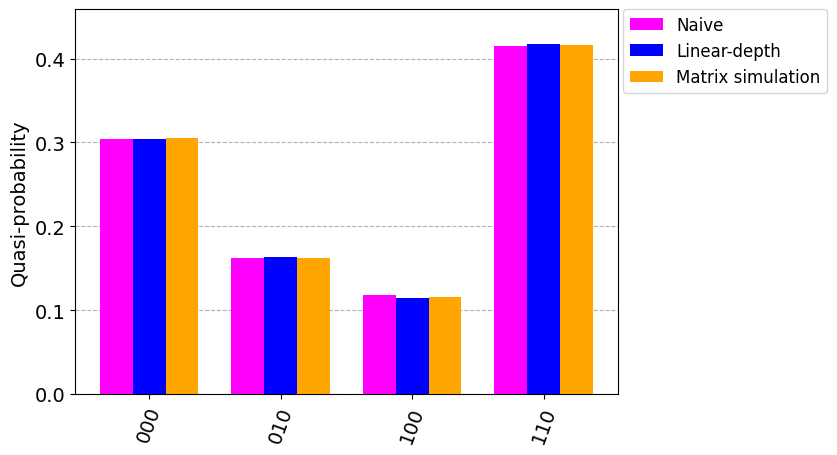

In [5]:
plot_histogram([counts1,counts2,counts3], legend=['Naive','Linear-depth', 'Matrix simulation'],
               color=['magenta','blue','orange'],bar_labels=False)

In [6]:
angles

array([[ 0.4428618 , -2.75804421,  1.14336741,  0.93947928],
       [ 1.96205568, -0.69505813, -0.93073807,  2.24070635],
       [ 1.49774191, -2.15701646, -1.01560321,  0.14940148],
       [ 2.11542966, -2.14555535, -1.91430737,  2.75115476],
       [ 1.79317257, -0.1252431 ,  0.98458328,  2.02941412],
       [ 1.40964177,  1.48453839,  2.76089164,  2.03832658],
       [ 0.84507195,  1.38191503, -1.93712092,  2.01521628],
       [ 1.59389542, -1.33020952, -0.28413324,  0.55982948]])

### Plots

In [2]:
n_max = 8
n_abs = [i for i in range(1,n_max+1)]

# Depth
depth_naive = []
depth_linear = []
depth_naive_compiled = []
depth_linear_compiled = []

# Quantum gates
gate_naive = []
gate_linear = []
gate_naive_compiled = []
gate_linear_compiled = []

# Collecting the datas

basis = ['cx', 'rx', 'ry', 'rz', 'p']
simulator = QasmSimulator()

for i in range(1,n_max+1):
    print(i)
    angle = random_angles(i)
    # Building the circuits
    qc_naive = build_naive_circuit(i,angle)
    qc_linear = build_linear_depth_circuit(i,angle)
    # Getting the compiled circuits
    qc_naive_compiled = transpile(qc_naive, simulator, basis_gates=basis, optimization_level=2)
    qc_linear_compiled = transpile(qc_linear, simulator, basis_gates=basis, optimization_level=2)
    # Depth
    depth_naive.append(qc_naive.depth())
    depth_linear.append(qc_linear.depth())
    depth_naive_compiled.append(qc_naive_compiled.depth())
    depth_linear_compiled.append(qc_linear_compiled.depth())
    # Number of gate
    gate_naive.append(sum(dict(qc_naive.count_ops()).values()))
    gate_linear.append(sum(dict(qc_linear.count_ops()).values()))
    gate_naive_compiled.append(sum(dict(qc_naive_compiled.count_ops()).values()))
    gate_linear_compiled.append(sum(dict(qc_linear_compiled.count_ops()).values()))

1
2
3
4
5
6
7
8


In [3]:
def plot(x,y1,y2,label):
    plt.plot(x,y2,label='Linear-depth circuit',marker='o',markeredgecolor='green',markerfacecolor='green')
    plt.plot(x,y1,label='Naive circuit',marker='o',markeredgecolor='red',markerfacecolor='red')
    plt.xlabel('n', fontsize=15)
    plt.ylabel(label, fontsize=13)
    plt.legend(prop={'size':12})
    plt.savefig(label+".png")
    plt.show()

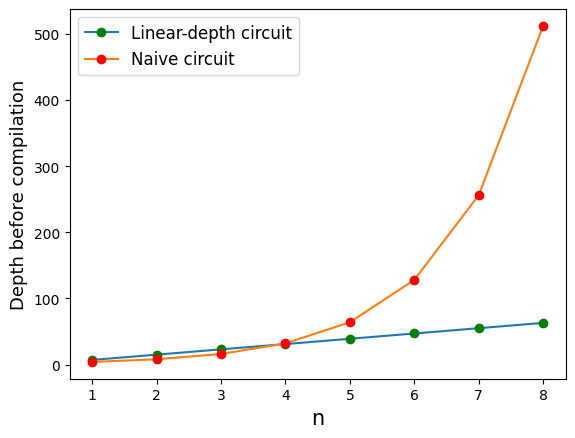

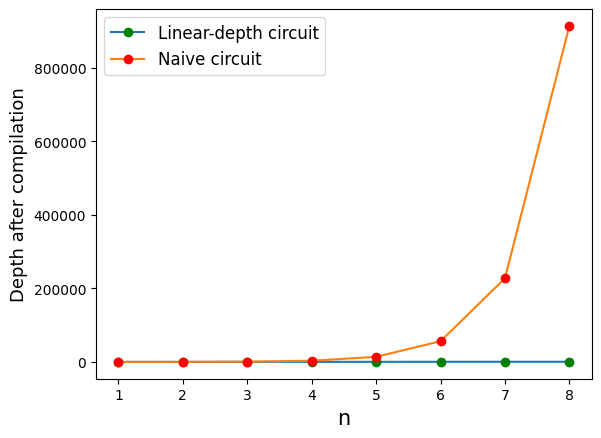

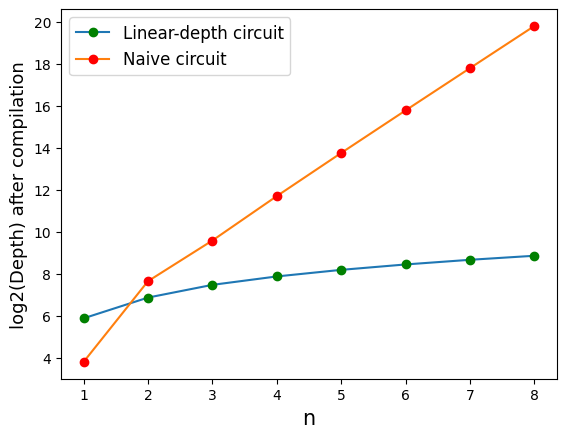

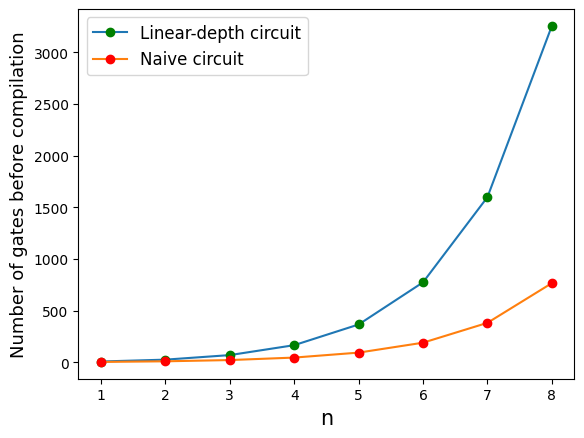

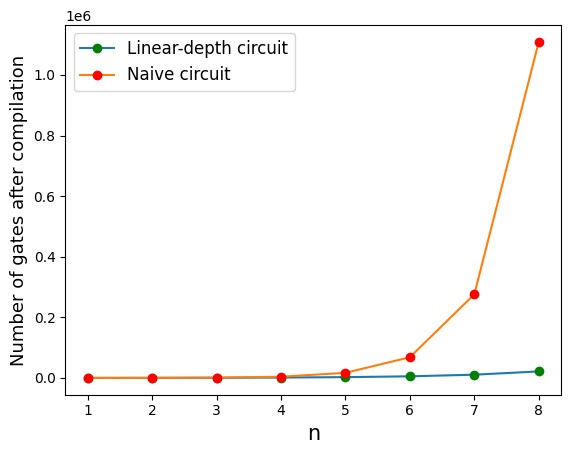

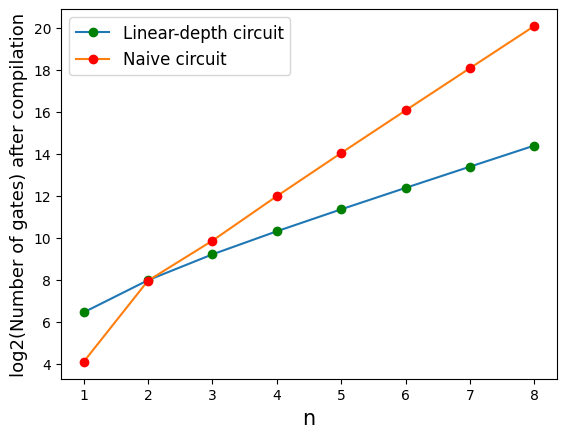

In [4]:
plot(n_abs, depth_naive, depth_linear, 'Depth before compilation')
plot(n_abs, depth_naive_compiled, depth_linear_compiled, 'Depth after compilation')
plot(n_abs, np.log2(depth_naive_compiled), np.log2(depth_linear_compiled), 'log2(Depth) after compilation')
plot(n_abs, gate_naive, gate_linear, 'Number of gates before compilation')
plot(n_abs, gate_naive_compiled, gate_linear_compiled, 'Number of gates after compilation')
plot(n_abs, np.log2(gate_naive_compiled), np.log2(gate_linear_compiled), 'log2(Number of gates) after compilation')

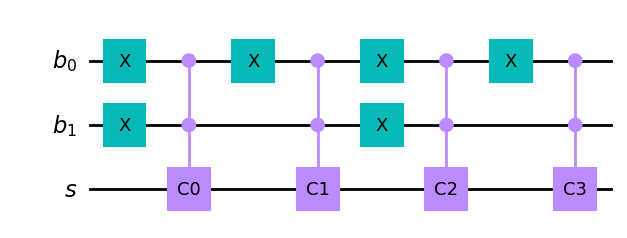

In [7]:
naive_qc = build_naive_circuit(2,random_angles(2))
naive_qc.draw("mpl")

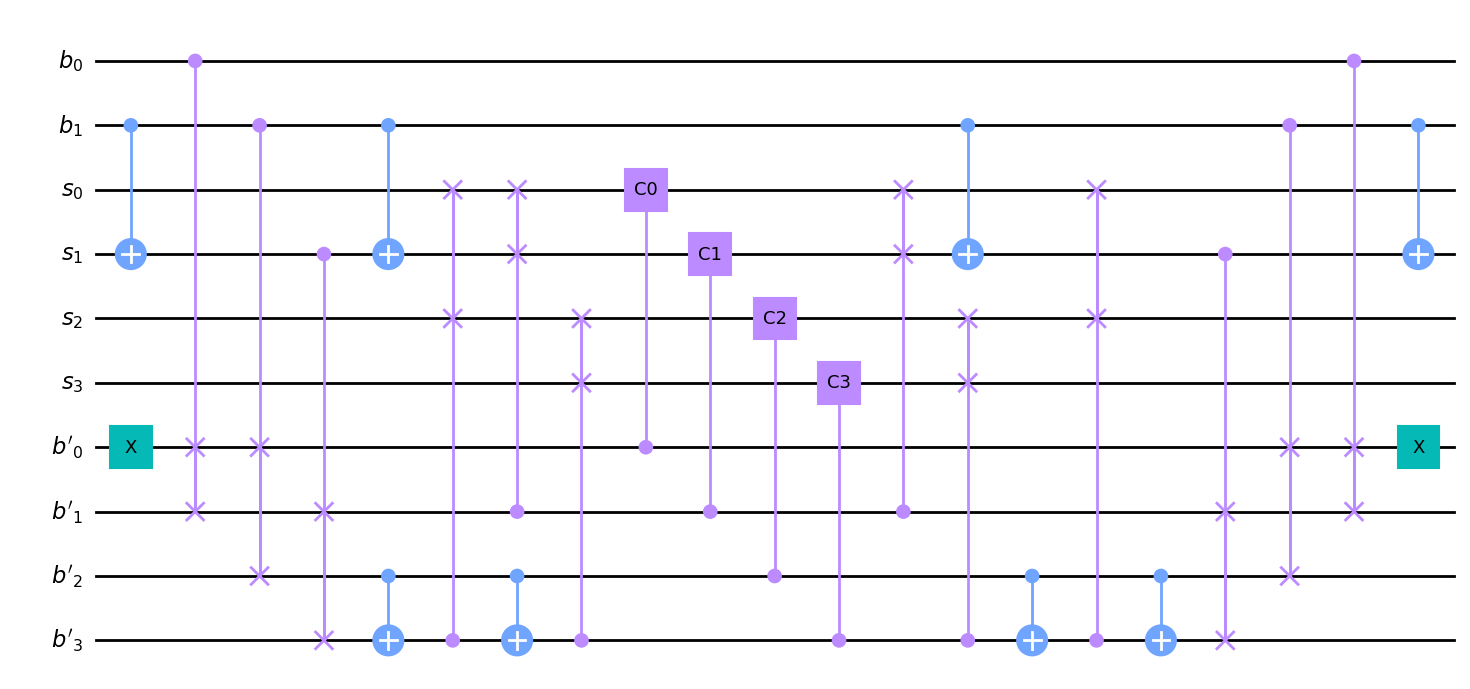

In [8]:
linear_qc = build_linear_depth_circuit(2,random_angles(2))
linear_qc.draw("mpl")

In [2]:
n = 3
qft = qft_shift(n)
fuji = shift(n)

simulator = QasmSimulator()
basis = ['rx', 'ry', 'rz', 'p','cx']

qft_compiled = transpile(qft, simulator, basis_gates=basis, optimization_level=3)
print(qft_compiled.depth(), sum(dict(qft_compiled.count_ops()).values()))
print(qft.depth())

23 30
11


In [3]:
fuji_compiled = transpile(fuji, simulator, basis_gates=basis, optimization_level=2)
print(fuji_compiled.depth(), sum(dict(fuji_compiled.count_ops()).values()))

74 90


In [4]:
print(sum(dict(qft.count_ops()).values()), sum(dict(qft_compiled.count_ops()).values()))

13 30


In [5]:
linear = build_linear_depth_circuit(n, random_angles(n))

linear_compiled = transpile(linear, simulator, basis_gates=basis, optimization_level=2)

print(sum(dict(linear.count_ops()).values()), sum(dict(linear_compiled.count_ops()).values()))

70 591
